# Human Activity Recognition

# Problem Statement : Given a new datapoint we have to predict the Activity

## Project Description
- This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.
- This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. 
- This experiment was video recorded to label the data manually.

## How data was recorded 

- By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations.
- prefix 't' in those metrics denotes time.
- suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.


## Feature names: 
1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 
2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
In our dataset, each datapoint represents a window with different readings
3. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz. 
4. After that, the body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 
5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag. 
6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.,. 
7. These are the signals that we got so far.
    •	tBodyAcc-XYZ 
    •	tGravityAcc-XYZ 
    •	tBodyAccJerk-XYZ 
    •	tBodyGyro-XYZ 
    •	tBodyGyroJerk-XYZ 
    •	tBodyAccMag 
    •	tGravityAccMag 
    •	tBodyAccJerkMag 
    •	tBodyGyroMag 
    •	tBodyGyroJerkMag 
    •	fBodyAcc-XYZ 
    •	fBodyAccJerk-XYZ 
    •	fBodyGyro-XYZ 
    •	fBodyAccMag 
    •	fBodyAccJerkMag 
    •	fBodyGyroMag 
    •	fBodyGyroJerkMag 
8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.
    - mean(): Mean value 
    - std(): Standard deviation 
    - mad(): Median absolute deviation 
    - max(): Largest value in array
    - min(): Smallest value in array 
    - sma(): Signal magnitude area 
    - energy(): Energy measure. Sum of the squares divided by the number of values. iqr(): Interquartile range 
    - entropy(): Signal entropy 
    - arCoeff(): Autorregresion coefficients with Burg order equal to 4 
    - correlation(): correlation coefficient between two signals 
    - maxInds(): index of the frequency component with largest magnitude 
    - meanFreq(): Weighted average of the frequency components to obtain a mean frequency 
    - skewness(): skewness of the frequency domain signal 
    - kurtosis(): kurtosis of the frequency domain signal 
    - bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window. 
    - angle(): Angle between to vectors. 
9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable
'•	gravityMean 
 •	tBodyAccMean
 •	tBodyAccJerkMean 
 •	tBodyGyroMean 
 •	tBodyGyroJerkMean
    
### Y_Labels(Encoded): In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers. 
1. WALKING as 1 
2. WALKING_UPSTAIRS as 2 
3. WALKING_DOWNSTAIRS as 3 
4. SITTING as 4 
5. STANDING as 5 
6. LAYING as 6


### Train and test data were saperated 

- The readings from 70% of the volunteers were taken as trianing data and remaining 30% subjects recordings were taken for test data.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [3]:
df = pd.concat([train, test], axis = 0)

In [4]:
df.shape

(10299, 564)

In [5]:
df.duplicated().sum()

0

In [6]:
df.head(10)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5,STANDING


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 44.4+ MB


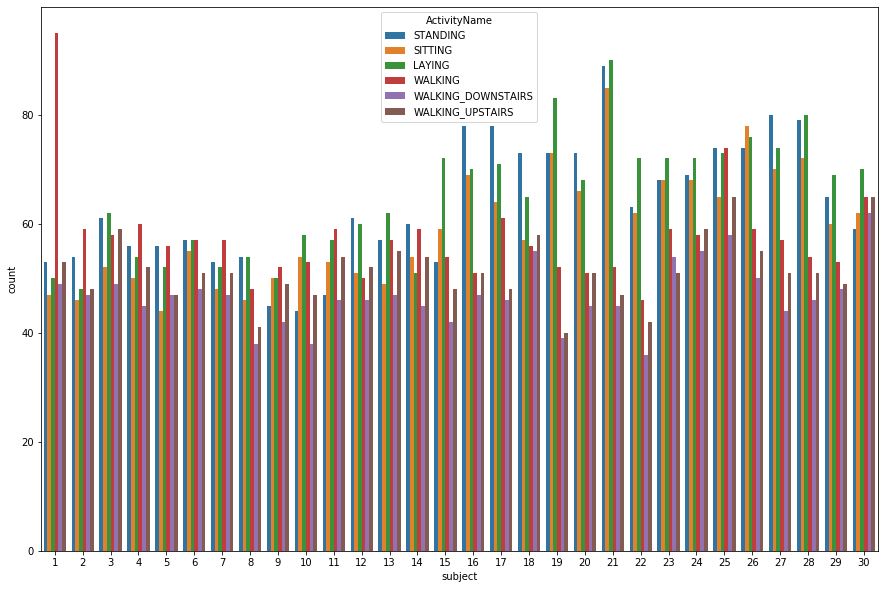

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot( x = 'subject', hue='ActivityName', data=df)
plt.show()

(array([1722.,    0., 1544.,    0., 1406.,    0., 1777.,    0., 1906.,
        1944.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

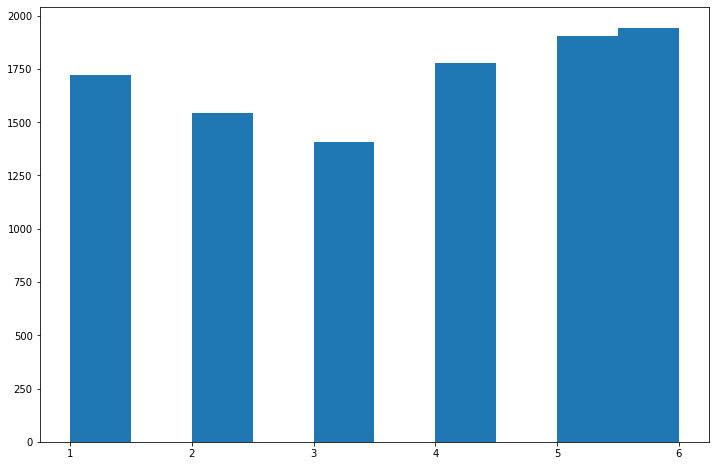

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(x = 'Activity', data=df)

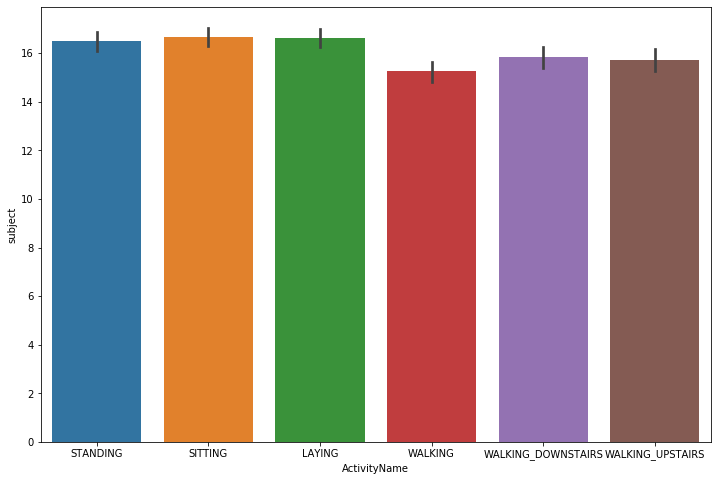

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x='ActivityName', y='subject',data=df)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['ActivityName'] = le.fit_transform(df['ActivityName'])

x = df.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y = df.ActivityName

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Applying Models :

### Logistic Regression Model :

In [12]:
x_test

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
1054,0.281747,-0.015731,-0.116895,-0.980151,-0.972841,-0.965590,-0.981409,-0.974416,-0.964874,-0.923035,...,0.327720,-0.488161,-0.813712,-0.052652,0.478038,0.451561,0.046766,0.579053,-0.890610,-0.100726
2514,0.306066,-0.082031,-0.137626,0.129811,0.814160,0.791321,0.002110,0.660297,0.678919,0.471613,...,0.130566,-0.156650,-0.521736,-0.311993,0.477063,-0.497790,-0.453062,-0.489468,0.258590,0.338957
2058,0.275295,-0.019225,-0.111404,-0.992648,-0.988665,-0.979167,-0.993683,-0.988656,-0.982600,-0.937211,...,0.317769,-0.651750,-0.898899,0.003457,-0.105294,-0.480906,-0.107174,-0.689347,0.246342,0.177493
2847,0.214497,-0.106374,-0.060979,0.019823,-0.120213,-0.226928,-0.079692,-0.083468,-0.177822,0.228731,...,-0.115247,-0.529752,-0.830138,0.017508,-0.228723,-0.950961,-0.276931,-0.758466,0.251779,-0.049250
794,0.242757,-0.000758,-0.069354,-0.382623,0.070014,-0.478552,-0.392092,-0.036307,-0.428664,-0.252421,...,-0.202431,0.052274,-0.338604,0.311820,-0.870191,-0.814202,-0.340962,-0.959472,0.117295,0.040097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.190608,-0.038961,-0.106985,-0.080904,0.881921,-0.308120,-0.139266,0.848841,-0.331182,0.185831,...,0.165760,-0.033172,-0.449182,0.435380,-0.342914,-0.840752,0.171650,-0.664489,0.329716,0.007896
781,0.277391,-0.018093,-0.113496,-0.968776,-0.978847,-0.947651,-0.982553,-0.983193,-0.950618,-0.863157,...,-0.491335,0.025136,-0.458384,-0.039363,-0.389424,-0.767960,0.340948,-0.876416,0.058378,0.099542
1106,0.234056,-0.011146,-0.138807,0.266095,-0.000465,-0.626379,0.154830,-0.065835,-0.615245,0.540279,...,0.004436,-0.180334,-0.607718,0.489184,-0.648857,0.607050,-0.092514,-0.849034,0.202142,0.008422
1526,0.283528,-0.012257,-0.109111,-0.994976,-0.971214,-0.976348,-0.995268,-0.968851,-0.973573,-0.936676,...,0.600961,0.011653,-0.250294,-0.151074,0.010673,0.027032,0.713108,-0.748112,0.243002,0.117235


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

log_reg = accuracy_score(y_test, pred)
log_reg

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9831715210355987

### K-Nearest Neighbours Model :

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

knn_score = accuracy_score(y_test, pred)
knn_score

0.9669902912621359

### Support Vector Machine Model :

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

svc_score = accuracy_score(y_test, pred)
svc_score

0.9711974110032362

### Decision Tree Classifier Model :

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

pred = dtc.predict(x_test)

dtc_score = accuracy_score(y_test, pred)
dtc_score

0.9320388349514563

### Random Forest Classifier Model :

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)

rfc_score = accuracy_score(pred, y_test)
rfc_score

0.973462783171521

### Naïve Bayes Model :

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)

gnb_score = accuracy_score(pred, y_test)
gnb_score

0.7190938511326861

### Stochastic Gradient Descent Model :

In [19]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)

pred = sgdc.predict(x_test)

sgdc_score = accuracy_score(pred, y_test)
sgdc_score

0.968284789644013

## Conclusion :

In [20]:
fin_res = {'Models' : ['Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'Naïve Bayes', 'Stochastic Gradient Descent'], 
'Accuracy_Score': [log_reg, knn_score, svc_score, dtc_score, rfc_score, gnb_score, sgdc_score]}

nums=[1, 2, 3, 4, 5, 6, 7]

conclusion = pd.DataFrame(fin_res, index=nums)
conclusion

,Models,Accuracy_Score
1,Logistic Regression,0.983172
2,K-Nearest Neighbours,0.966990
3,Support Vector Machine,0.971197
4,Decision Tree Classifier,0.932039
5,Random Forest Classifier,0.973463
6,Naïve Bayes,0.719094
7,Stochastic Gradient Descent,0.968285


In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [23]:
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [25]:
le_train = LabelEncoder()
train['ActivityName'] = le_train.fit_transform(train['ActivityName'])

le_test = LabelEncoder()
test['ActivityName'] = le_test.fit_transform(test['ActivityName'])

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

log_reg = accuracy_score(y_test, pred)
log_reg

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9582626399728538

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

knn_score = accuracy_score(y_test, pred)
knn_score

0.9002375296912114

In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

svc_score = accuracy_score(y_test, pred)
svc_score

0.9504580929759077

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

pred = dtc.predict(x_test)

dtc_score = accuracy_score(y_test, pred)
dtc_score

0.8622327790973872

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

pred = rfc.predict(x_test)

rfc_score = accuracy_score(pred, y_test)
rfc_score

0.9175432643366135

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred = gnb.predict(x_test)

gnb_score = accuracy_score(pred, y_test)
gnb_score

0.7702748557855447

In [32]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)

pred = sgdc.predict(x_test)

sgdc_score = accuracy_score(pred, y_test)
sgdc_score

0.9562266711910418

In [33]:
fin_res = {'Models' : ['Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'Naïve Bayes', 'Stochastic Gradient Descent'], 
'Accuracy_Score': [log_reg, knn_score, svc_score, dtc_score, rfc_score, gnb_score, sgdc_score]}

nums=[1, 2, 3, 4, 5, 6, 7]

conclusion = pd.DataFrame(fin_res, index=nums)
conclusion

,Models,Accuracy_Score
1,Logistic Regression,0.958263
2,K-Nearest Neighbours,0.900238
3,Support Vector Machine,0.950458
4,Decision Tree Classifier,0.862233
5,Random Forest Classifier,0.917543
6,Naïve Bayes,0.770275
7,Stochastic Gradient Descent,0.956227
